### [1st - December 2, 2019] Persatuan Ular Python Indonesia Tokodai
# Pi estimator using Monte Carlo method 

![](pi_mc.png)

1. Generate $N$ random datapoints $(x,y)\in[0,1]\times[0,1]$.
2. For any datapoints inside the circle are counted as <span style="color:blue">hit</span>.
3. Calculate pi.
$$
\frac{\text{(# of hits)}}{N} \to \frac{\text{circle area}}{\text{square area}}=\frac{\pi}{4} \quad \left( N \to \infty\right)   
$$
4. Analyze the error.

![](error.png)

#### Skill to be aquired :
* Array manipulation using Numpy
* Generating random number using Numpy
* Plotting using matplotlib/pyplot
* Monte Carlo method
* Logical thingking and algorithm development 

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

----
## Part 1 : Pi estimator

In [19]:
# Initialization
N = 10000
x = np.random.rand(N)
y = np.random.rand(N)

circ_x = np.linspace(0,1,100)
circ_y = np.sqrt(1-circ_x**2)

In [3]:
# Hit-or-miss determination (w/o loop)
hit_x  = x[x**2+y**2 <= 1]  #Select only elements of x which satisfies x**2+y**2 <= 1
hit_y  = y[x**2+y**2 <= 1]
miss_x = x[x**2+y**2 > 1]
miss_y = y[x**2+y**2 > 1]

# Bug check
if (hit_x.shape[0] + miss_x.shape[0] != N) or (hit_y.shape[0] + miss_y.shape[0] != N):
    print("Bug was found in code! Fix me!")

# Pi estimator and report
pi_mc = 4* hit_x.shape[0]/N
print("N                :", N)
print("Pi (Monte Carlo) :", pi_mc)
print("Pi (Numpy)       :", np.pi)
print("Abs. Error       :", np.abs(pi_mc-np.pi))

N                : 1000
Pi (Monte Carlo) : 3.22
Pi (Numpy)       : 3.141592653589793
Abs. Error       : 0.07840734641020708


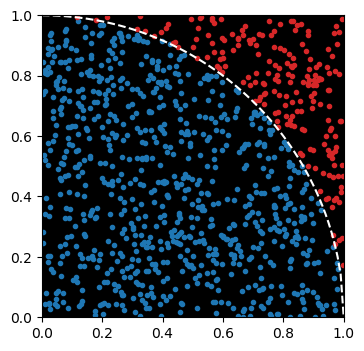

In [5]:
# Plotting

fig, ax = plt.subplots(1, 1, figsize = (6, 4), dpi= 100)

ax.plot( hit_x,  hit_y,  '.', c='C0')
ax.plot(miss_x, miss_y,  '.', c='C3')
ax.plot(circ_x, circ_y, '--', c='w')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box')
ax.set_facecolor("k")
plt.show()

----
## Part 2: Error Analysis

In [20]:
# Initialization

Npern = 100                           # Number of datasets/tests (can be equal to N but it's too many)
n = N//Npern * np.arange(1, Npern+1) # Sampling size for each dataset/test

pi_array = np.zeros(Npern)           # Estimated pi for each dataset/test

n_refs = np.arange(1, N+1)           # Sampling size for reference
pi_refs = np.pi*np.ones(N)           # Numpy.pi for reference

# Pi estimation for each dataset/test
for iCnt1 in range (Npern):         
    x2 = np.random.rand(n[iCnt1])
    y2 = np.random.rand(n[iCnt1])
    pi_array[iCnt1] = np.where( x2**2+y2**2 <= 1)[0].shape[0] / n[iCnt1]

# Calibration
pi_array = 4*pi_array

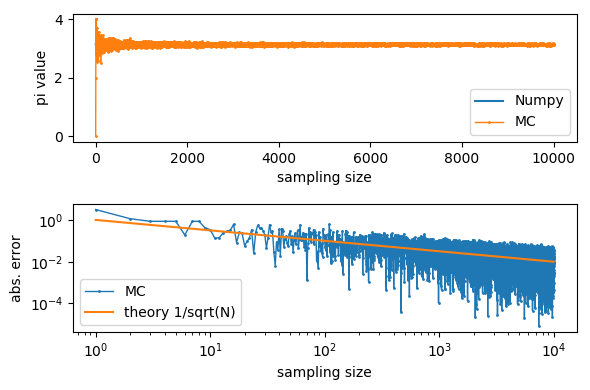

In [30]:
# Plotting

fig, ax = plt.subplots(2, 1, figsize = (6, 4), dpi= 100)

ax[0].plot(n_refs, pi_refs, label="Numpy")
ax[0].plot(n, pi_array, '.-', markersize=2, linewidth=1, label="MC")
ax[0].set_xlabel("sampling size")
ax[0].set_ylabel("pi value")
ax[0].legend()

ax[1].plot(n, np.abs(pi_array-np.pi), '.-', markersize=2, linewidth=1, label="MC")
ax[1].plot(n, 1/np.sqrt(n), label="theory 1/sqrt(N)")
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel("sampling size")
ax[1].set_ylabel("abs. error")
ax[1].legend()

fig.tight_layout()

plt.show()